# Astroparticle Physics 1 - Project Study
## Hubble's Data
In 1929 Edwin Hubble published an [article](https://doi.org/10.1073/pnas.15.3.168) in which he presented empirical evidence that our universe is expanding. At that time, most of the scientists believed in a static universe. After publishing Hubble’s article, Einstein called the assumption of static universe his *biggest mistake*. He went to Mount Wilson Observatory to thank Hubble for his great discovery.


![Erwin Hubble](https://www.wissenschaft-x.com/image0421/fe/fe2fac142e2777450f3905ab0f4d7885.jpg)

In this article, Hubble demonstrated that galaxies are moving away from Earth with a recession velocity that is linearly correlated to their distance from Earth. This relation, which is known as Hubble’s Law, is represented as follow:
\begin{align}
    v = H_0 \cdot D
\end{align}
with $v$ being the galaxy's radial recessional velocity and $D$ a galaxy's distance from Earth. $H_0$ is a empirically determined constant called Hubble's constant. 
In his original measurement from 1929, Hubble used a sample of galaxies whose distances where known. Instead of radial velocity, he used the redshift which relates to the radial velocity by
\begin{align}
    v = c \cdot z
\end{align}
with $z$ being the redshift and $c$ the speed of light.


## Overview
In this project, you will analalyze the Hubble's original data set from 1929 and compare it to recent measurements. The project contains excersises in section of this [`Jupyter` notebook](https://docs.jupyter.org/en/latest/). Your answers should contain the code, your plots and the written text all within this notebook after the sections of each excersise. Please feel free to edit this notebook and add as many new cells as you need without changing the general structure of the notebook. 

I case of any questions, you can always ask the tutors in the tutorials for each project as well as write an e-mail to [Florian Henkes](mailto:florian.henkes@tum.de). 

## General style remarks
All answer should go into this notebook by adding [Markdown](https://www.markdownguide.org/getting-started/) cells for written text and code cells for your [`python`](https://docs.python.org/3.10/) code. [Here](https://www.markdownguide.org/cheat-sheet/), you can find a cheatsheet for Markdown. Please consider also to use `Latex` expressions within your Markdown cells if you want to insert any kind of equations.

In addition, there will be a small introduction to `python` in the first tutorial with some information for installation and usage in the first tutorial. 

If you use additional `python` packages, please put all `import` statements in the cell below this one to make it easier to read and correct your notebooks such as 
``` python
    import your_package
```

If you have less or no experience with `python` analysis, some good starting points are the documentations of [`numpy`](https://numpy.org/doc/stable/user/absolute_beginners.html) for fast numerical array programming, [`pandas`](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) for efficient and easy table management as well as [`matplotlib`](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) for plotting.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from hypatie.simbad import sql2df
import scipy.stats as ss
%matplotlib inline

#plt.rcParams.update({'font.size': 12})

## Submission
The excersises contain two additional markers of the level of difficulty: *optional* and *for the experts*. To get the grade bonus of 0.3, it is mandatory to submit non-marked excersise and at least two out of the four *optional* excersises. However, feel free to submit all excersises.

After you have finished all excersise, please upload your `jupyter` notebook (and only your notebook) to the Moodle course into your personal submission for the project until the 13th of December. Please name your notebook according to `project1_hubble_FlorianHenkes.ipynb` by exchanging `FlorianHenkes` with your name.

## Excersise 1
The goal of this excersise is the analysis of Hubble's original from 1929 and extract the Hubble constant from it.

a) Load the data from the Hubble and plot the data points. You can find a csv version of the measurement points in this [link](https://tumde-my.sharepoint.com/:f:/g/personal/florian_henkes_tum_de/ErPbLVMYMyVPr8R2HXXw7PEB_Z-NgXDnBHVg8yOsoFv0kQ?e=je8akW) or directly download them from Hubble's paper. Print all loaded data together with the mean and standard deviation to get an overview of the velocity and distance of the samples.

In [20]:
galaxy = np.array([])   # array with galaxy names
distance = np.array([]) # array with distances
velocity = np.array([]) # array with velocities
with open("hubble1929.csv") as f1:
    next(f1) # Skip the first line with text
    for line in f1:
        line = line.rstrip().split(",")
        galaxy = np.append(galaxy,line[0])
        distance = np.append(distance,float(line[1]))
        velocity = np.append(velocity,int(line[2]))

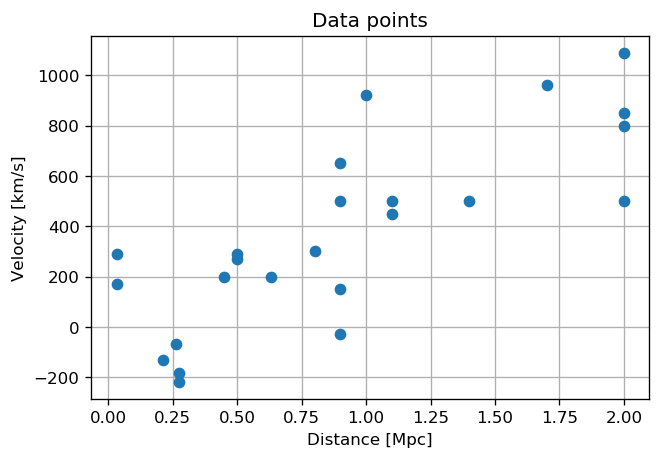

In [21]:
plt.figure(dpi=120)
plt.title("Data points")
plt.plot(distance,velocity,'o')
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.grid()
plt.show()

Mean is defined as $$\mu = \frac{\Sigma \mu_i}{N},$$

and the standard deviation is defined as $$\sigma = \sqrt{\frac{\Sigma (\mu_i - \mu)^2}{N}}.$$

In [22]:
mean_d = sum(distance) / len(distance) # Mean distance
dev_d = 0
for i in range(len(distance)):
    dev_d += (distance[i] - mean_d)**2
SD_d = np.sqrt(dev_d / len(distance)) # Standard deviation distance

mean_v = sum(velocity) / len(velocity) # Mean velocity
dev_v = 0
for i in range(len(velocity)):
    dev_v += (velocity[i] - mean_v)**2
SD_v = np.sqrt(dev_v / len(velocity)) # Standard deviation velocity

print(f"galaxy , distance , mean_d , SD_d , velocity , mean_v , SD_v \n------------------------------------------------------------")
for i in range(len(distance)):
    print(f"{galaxy[i]} , {distance[i]} , {mean_d:.3f} , {SD_d:.3f} , {velocity[i]} , {mean_v:.3f} , {SD_v:.3f}")

galaxy , distance , mean_d , SD_d , velocity , mean_v , SD_v 
------------------------------------------------------------
S.Mag , 0.032 , 0.911 , 0.632 , 170.0 , 373.125 , 363.438
L.Mag , 0.034 , 0.911 , 0.632 , 290.0 , 373.125 , 363.438
NGC.6822 , 0.214 , 0.911 , 0.632 , -130.0 , 373.125 , 363.438
NGC.598 , 0.263 , 0.911 , 0.632 , -70.0 , 373.125 , 363.438
NGC.221 , 0.275 , 0.911 , 0.632 , -185.0 , 373.125 , 363.438
NGC.224 , 0.275 , 0.911 , 0.632 , -220.0 , 373.125 , 363.438
NGC.5457 , 0.45 , 0.911 , 0.632 , 200.0 , 373.125 , 363.438
NGC.4736 , 0.5 , 0.911 , 0.632 , 290.0 , 373.125 , 363.438
NGC.5194 , 0.5 , 0.911 , 0.632 , 270.0 , 373.125 , 363.438
NGC.4449 , 0.63 , 0.911 , 0.632 , 200.0 , 373.125 , 363.438
NGC.4214 , 0.8 , 0.911 , 0.632 , 300.0 , 373.125 , 363.438
NGC.3031 , 0.9 , 0.911 , 0.632 , -30.0 , 373.125 , 363.438
NGC.3627 , 0.9 , 0.911 , 0.632 , 650.0 , 373.125 , 363.438
NGC.4826 , 0.9 , 0.911 , 0.632 , 150.0 , 373.125 , 363.438
NGC.5236 , 0.9 , 0.911 , 0.632 , 500.0 , 37

b) Plot the data points as a scatter plot first and add the galaxy names as annotations to the data point. 

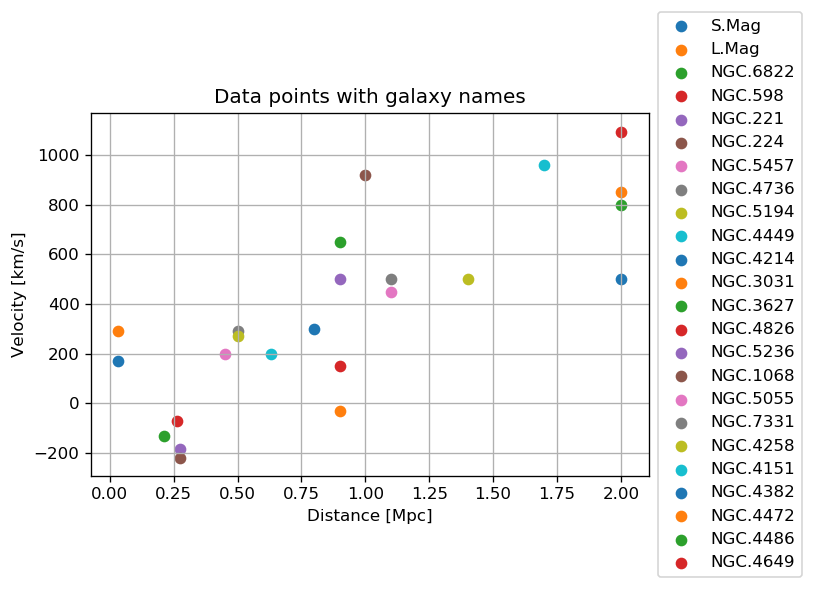

In [23]:
plt.figure(dpi=120)
plt.title("Data points with galaxy names")
for i in range(len(distance)):
    plt.scatter(distance[i],velocity[i],label=galaxy[i])
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

c) Plot the normalized deviations of the distances and recessional velocitites from their mean to examine their relationship with the array index as x-axis. What can you observe out of this plot? *Hint*: Normalize the deviations by their standard deviation.

To normalize the deviations I use $$\tilde{x_i} = \frac{x_i - \mu}{\sigma},$$ where $x_i$ is the measurement and $\mu$ and $\sigma$ as above.

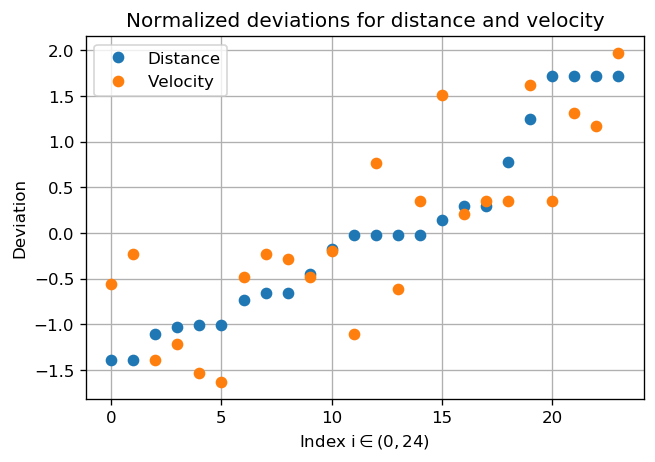

In [24]:
dist_devs = np.array([(distance[i]-mean_d)/SD_d for i in range(len(distance))])
velo_devs = np.array([(velocity[i]-mean_v)/SD_v for i in range(len(velocity))])
x_ax = np.arange(len(distance))

plt.figure(dpi=120)
plt.title("Normalized deviations for distance and velocity")
plt.plot(x_ax,dist_devs,"o",label="Distance")
plt.plot(x_ax,velo_devs,"o",label="Velocity")
plt.grid()
plt.xlabel(r"Index i$\in (0,24)$")
plt.ylabel("Deviation")
plt.legend()
plt.show()

The normalized deviations are quite linear. This means that the data points may fit with a linear regression as the points deviate linearly from the mean value. This is more clear for the distances, as the velocities deviates more from the mean value.

d) [**Optional**]: Write down the formula for the Pearson’s R and the Spearman’s rank correlation coefficient. Calculate the two coefficients for Hubble's dataset by implementing the formula directly in two `python` functions. What do the values tell about the correlation between distance and velocity? Explain in simple words when the Pearson’s R and the Spearman’s rank correlation coefficients can be used in general and why it adapts to our example.

Pearson's R: 
$$r = r(x,y) = \frac{n\Sigma xy - (\Sigma x)(\Sigma y)}{\sqrt{[n\Sigma x^2 -(\Sigma x)^2][n\Sigma y^2 -(\Sigma y)^2]}}.$$

Spearman's rank correlation coefficient:
$$r_s = r(R(X),R(Y)),$$
where $R(X)$ is the rank of $X$.

In [25]:
def r_pearson(x,y):
    n = len(x)
    xy = x*y
    x2 = x**2
    y2 = y**2
    
    r = (n * sum(xy) - sum(x)*sum(y)) / np.sqrt((n*sum(x2) - (sum(x))**2) * (n*sum(y2) - (sum(y))**2))
    return r

def r_spearman(x,y):
    rank_x = ss.rankdata(x)
    rank_y = ss.rankdata(y)
    rs = r_pearson(rank_x,rank_y)
    return rs

print(f"r   = {r_pearson(distance,velocity)}")
print(f"r_s = {r_spearman(distance,velocity)}")

print("\nCompare with scipy functions:") # Only to show the correctness of the functions above
print(f"r   = {ss.pearsonr(distance,velocity)[0]}")
print(f"r_s = {ss.spearmanr(distance,velocity)[0]}")

r   = 0.7896394879353185
r_s = 0.7995642051805973

Compare with scipy functions:
r   = 0.7896394879353184
r_s = 0.7995642051805972


These values tell us that a linear regression is a relatively good fit for the correlation between distance and velocity, as they both are close to $1$.

Both models give a value between $-1$ and $1$, where values close to these limit values means the data has a strong linear correlation. For us, it can show us that a linear regression of the data is a good choice.

e) Perform an ordinary least squares (OLS) regression to further understand this relationship as a result of a linear function. Plot the resulting best fit together with the data points and print the best fit results for slope and intercept together with their uncertainty. Which value has the Hubble constant? 

In [26]:
OLS = sm.OLS(velocity,distance).fit()
print(OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              101.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                    6.87e-10
Time:                        10:50:00   Log-Likelihood:                         -163.96
No. Observations:                  24   AIC:                                      329.9
Df Residuals:                      23   BIC:                                      331.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

*NOTE: In the calculation of my linear regression I have decided that the regression will go through the point (0,0), i.e. no intercept. This is because (from my understanding) a non-zero intercept would be equal to saying that we are measuring something a distance $0$ away (i.e. at the measuring point) with a non-zero velocity. However, the goal is to prove the expansion of the universe, and having a non-zero velocity at distance $0$ would be equal to claiming that, in this regression, the point itself is expanding away from (or towards) itself with a non-zero velocity. This makes little sense for me. However, this does not make that much difference in the regression, as can be seen from the data points as well.*

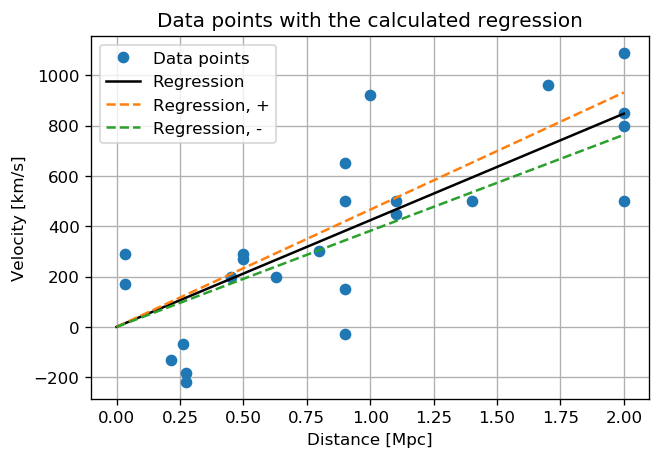

In [27]:
xs = np.arange(0,3)
reg = 423.9373 * xs
reg_pl = (423.9373 + 42.154) * xs
reg_mi = (423.9373 - 42.154) * xs

plt.figure(dpi=120)
plt.title("Data points with the calculated regression")
plt.plot(distance,velocity,"o",label="Data points")
plt.plot(xs,reg,'k',label="Regression")
plt.plot(xs,reg_pl,"--",label="Regression, +")
plt.plot(xs,reg_mi,"--",label="Regression, -")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.grid()
plt.legend()
plt.show()

Hubble's constant is here calculated to having the approximate value of $H_0 = 424 \pm 42 \tfrac{km/s}{Mpc},$ which differs a bit from the more updated value of around $72\frac{km/s}{Mpc}$. However, it fits with the first value based on Hubble's measurements of around $500\frac{km/s}{Mpc}$.

f) Plot the residuals of the fit and the data points in percentage. What can you observe?

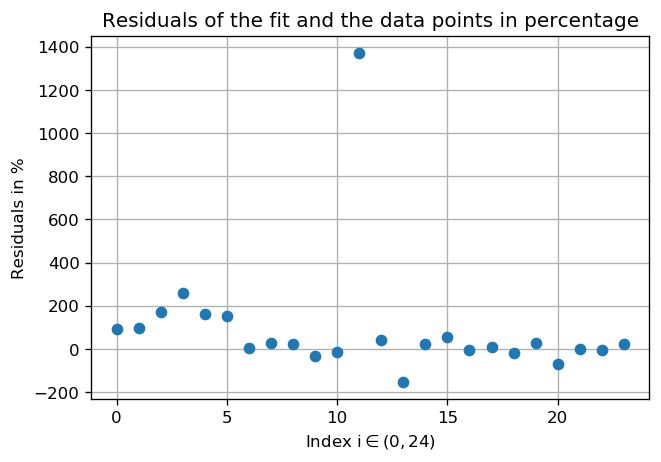

In [28]:
residual = np.array([((velocity[i] - 423.9373*distance[i])/velocity[i]) * 100 for i in range(len(distance))])

plt.figure(dpi=120)
plt.title("Residuals of the fit and the data points in percentage")
plt.plot(x_ax,residual,"o")
plt.grid()
plt.xlabel(r"Index i$\in (0,24)$")
plt.ylabel("Residuals in %")
plt.show()

Where the formula used for the residual $r$ is $$r_i = \frac{v_i - H_0 d_i}{v_i} \cdot 100,$$ where $v$ is the measured velocity, $d$ is the measured distance, and $H_0$ is the value of the Hubble constant calculated above.

The residual plot shows a that all data points, except the one at index $11$, seems to give quite small residuals. This shows that the linear regression fits rather well. 

*Note: The point at index $11$ which deviates from the others is due to this point having a negative velocity, making the residual bigger in the formula above.*

g) [**Optional**]: Write the formula and calculate the R-squared value as a *Goodness of fit* parameter for the perfomred OLS by implementing the formula directly in a `python` function. What does the calculated R-squared parameter tell you about the fit? Is there some physical effect that can cause deviations from Hubble's law (explain in a few words)?

R-squared is given as $$R^2 = 1 - \frac{\text{SSR}}{\text{TSS}},$$ where $\text{SSR}$ is the sum of squared residuals, and $\text{TSS}$ is the total sum of squares.

In [29]:
def r_squared(regr):
    return 1 - regr.ssr / regr.uncentered_tss

print(r_squared(OLS))

0.8147252501621436


The value indicates around $81\%$ of the variance is being explained in the regression fit. This means that the linear regression fit is rather good for our use.

Gravity is a physical effect that can cause deviations from Hubble's law as this may cause the movement of objects to be different than expected due to gravitational effects from other objects. The fact that Hubble's constant is not constant over time will also cause deviations from Hubble's law as that assumes constant expansion. 

h) [**Optional**]: Perform a two-tailed t-test for the slope parameter. First, explain in simple words what a t-test is. Then, use the nullhypothesis of $H_0 = 0$ versus the alternative hypothesis of $H_0 \neq 0$. Write down the formula for the t-test. What is the critical value $t_C$ for a t-test with a significane of $\alpha = 1\%$? What can you therefore say about the fitted Hubble constant? 

i) What was the problem with Hubble's measurement? Explain in your own words the limitations behind the method and the extracted value for $H_0$ used by Hubble.

Hubble's measurements were only for relatively short distances (~$2$Mpc), and this gives a rather small sample of the universe around us (in comparison Hubble Space Telescope measures distances up to ~$400$Mpc). In addition, we can see in the measurements that there are some scattering. This is partly due to gravitational effects, as some of the galaxies reside in clusters that leads to them pulling on each other giving velocities that does not fit well with the regression. From the values of Hubble's constant $H_0$ mentioned earlier, we can see that the value calculated by Hubble was far off the most used value today. 

## Excersise 2
The goal of this excersise is to use a modern astrophysical dataset to determine Hubble's constant and compare it to the original measurement of Hubble.

a) Load the [*Simbad*](https://simbad.u-strasbg.fr/simbad/) dataset from the *Centre de données astronomiques de Strasbourg* for galaxies greater than 100 Mpc and plot the data points. You can find a csv version of the measurement points in this [link](https://tumde-my.sharepoint.com/:f:/g/personal/florian_henkes_tum_de/ErPbLVMYMyVPr8R2HXXw7PEB_Z-NgXDnBHVg8yOsoFv0kQ?e=je8akW) or you can directly download them by yourself by using their `python` package. Herefore, first install the `hypatie` package with
``` python
pip install hypatie
```
Then, you can load the data by excecuting a `SQL` command which selects the first 1200 galaxies with their distance and redshift with distances $d>100$ Mpc and redshifts between $0 < z < 0.1$ with the `sqltodf` command of `hypatie` as follows:
``` python 
from hypatie.simbad import sql2df

sql = """
SELECT TOP 1200 
b.rvz_redshift AS z, d.dist AS D
FROM basic AS b
JOIN mesDistance as d ON b.oid=d.oidref
WHERE dist > 100 AND unit='Mpc' AND method='T-F'
AND rvz_redshift BETWEEN 0 AND 0.1
"""

df = sql2df(sql)
```

In [30]:
sql = """
SELECT TOP 1200 
b.rvz_redshift AS z, d.dist AS D
FROM basic AS b
JOIN mesDistance as d ON b.oid=d.oidref
WHERE dist > 100 AND unit='Mpc' AND method='T-F'
AND rvz_redshift BETWEEN 0 AND 0.1
"""

df = sql2df(sql)

b) Print all loaded data together with the mean and standard deviation to get an overview of the data sample. Calculate the radial recession velocity out of the measured redshifts. 

In [31]:
print(df)

                         z       d
0     0.033800049766428746  102.45
1      0.05348700266502368  173.78
2      0.05336358394980037  229.13
3      0.04590175514021771  232.17
4                 0.055138  161.27
5                  0.05285  181.73
6                 0.008006  126.05
7      0.01952393128101848  103.17
8      0.03674875636798041  233.34
9     0.037192396614593955  159.28
10    0.037225753024113774  203.93
11    0.054344262389682936  179.39
12     0.05099861451484547  213.16
13                  0.0233  215.67
14    0.028409653988026612  166.92
15    0.024126107844092193  112.16
16     0.05517718847747122  170.76
17     0.02338284307339046  101.65
18    0.036961040611774854  102.86
19     0.03828499950099706  151.03
20     0.04377361621285349  152.66
21     0.04672539799507547  122.23
22     0.05077846221201469  236.84
23                  0.0441  168.28
24    0.038219774027804264  149.44
25                0.021015   117.7
26                 0.04175  209.35
27                 0

In [32]:
df = df.astype("float")

mu_d = sum(df['d']) / 1200 # Mean distance
mu_z = sum(df['z']) / 1200 # Mean redshift

std_dist = np.sqrt( sum( (df['d'] - mu_d)**2 ) / 1200 ) # Standard deviation distance
std_red = np.sqrt( sum( (df['z'] - mu_z)**2 ) / 1200 )  # Standard deviation redshift

print(f"Mean_d  | SD_d   | Mean_z | SD_z\n---------------------------------\n{mu_d:.3f} | {std_dist:.3f} | {mu_z:.3f}  | {std_red:.3f}")

Mean_d  | SD_d   | Mean_z | SD_z
---------------------------------
151.890 | 45.300 | 0.036  | 0.009


The radial recession velocity can be found from $$v = c\cdot z,$$ as mentioned in the beginning.

In [33]:
c = 299792.458 # speed of light in [km/s]

rad_vel = c * df['z']

c) Perform an ordinary least squares (OLS) regression of the data points. Plot the resulting best fit together with the data points and print the best fit results for slope and intercept together with their uncertainty. Which value has the Hubble constant now?

In [34]:
OLS_simbad = sm.OLS(rad_vel,df['d']).fit()
print(OLS_simbad.summary())

                                 OLS Regression Results                                
Dep. Variable:                      z   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          1.651e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                        0.00
Time:                        10:50:01   Log-Likelihood:                         -11277.
No. Observations:                1200   AIC:                                  2.256e+04
Df Residuals:                    1199   BIC:                                  2.256e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

H0  = 68.31475712075029
dH0 = 0.5316182975329463


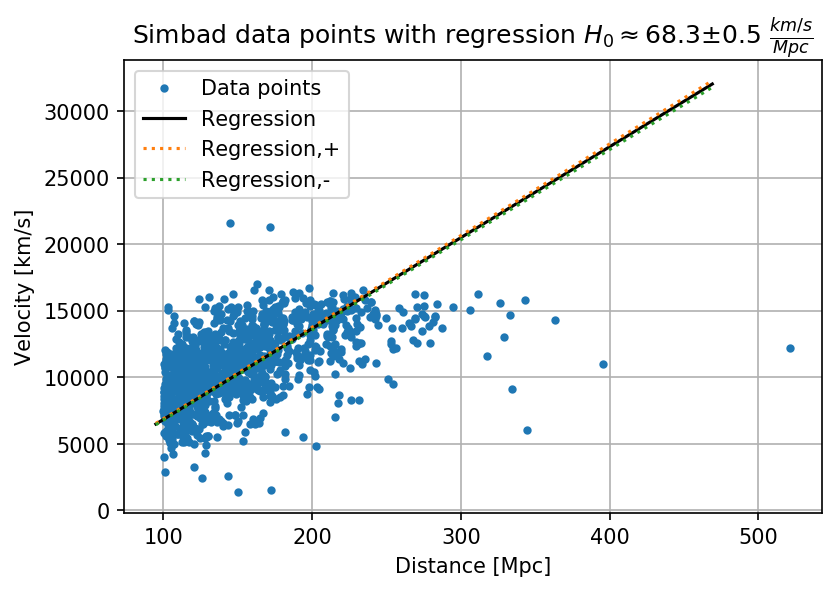

In [35]:
H0 = OLS_simbad.params[0]
dH0 = OLS_simbad.bse[0]
print(f"H0  = {H0}")
print(f"dH0 = {dH0}")

x_reg = np.arange(95,470)
regression = H0 * x_reg
regression_plus = (H0 + dH0) * x_reg
regression_minus = (H0 - dH0) * x_reg

plt.figure(dpi=150)
plt.title(r"Simbad data points with regression $H_0 \approx$"+f"{H0:.1f}"+r"$\pm$"+f"{dH0:.1f}"+r" $\frac{km/s}{Mpc}$")
plt.plot(df['d'],rad_vel,'.',label="Data points")
plt.plot(x_reg,regression,'k',label="Regression")
plt.plot(x_reg,regression_plus,':',label="Regression,+")
plt.plot(x_reg,regression_minus,':',label="Regression,-")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.grid()
plt.legend()
plt.show()

d) [**Optional**]: Calculate the R-squared value for the perfomred OLS together with the Pearson's R correlation and Spearman's rank correlation coefficient. Interpret the values.

In [36]:
print(f"R-squared    = {r_squared(OLS_simbad)}")
print(f"Pearson's R  = {r_pearson(df['d'],rad_vel)}")
print(f"Spearman's R = {r_spearman(df['d'],rad_vel)}")

R-squared    = 0.9323062516053651
Pearson's R  = 0.5314646307366633
Spearman's R = 0.6001179327457672


The $R^2$-value indicates that around $93\%$ of the variance is been accounted for in our fit, which is a near perfect result. However, values of Pearson's R and Spearman's R of around $0.5$ indicates a good fit, but that it could be better. It is interesting to note that a possible definition of $R^2$ is $R^2=r^2$, where $r$ is Pearson's R. This would give a value for $R^2 \approx 0.25$, which is far lower than the calculated value above. This value fits more with the values for the other correlation coefficients, and maybe seems like a better fit in the plot above as well.

e) [**For the experts**]: Use a clustering algorhithm to cluster the data points with a appropiate number of clusters. Explain in your own words how the clustering works and why it can be useful for such data sets. Plot the cluster centers together with all data points. Following, perform a linear fit with the cluster centers and extract the Hubble constant. What can you observe? Try to justify the clustering with a physics argument why it is sensful to apply it in our measurement.